In [183]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [184]:
print(tf.__version__)

1.12.0


In [185]:
QB5 = pd.read_csv('2015QB.csv')
RB5 = pd.read_csv('2015RB.csv')
WR5 = pd.read_csv('2015WR.csv')
TE5 = pd.read_csv('2015TE.csv')
QB6 = pd.read_csv('2016QB.csv')
RB6 = pd.read_csv('2016RB.csv')
WR6 = pd.read_csv('2016WR.csv')
TE6 = pd.read_csv('2016TE.csv')
QB7 = pd.read_csv('2017QB.csv')
RB7 = pd.read_csv('2017RB.csv')
WR7 = pd.read_csv('2017WR.csv')
TE7 = pd.read_csv('2017TE.csv')
QB8 = pd.read_csv('2018QB.csv')
RB8 = pd.read_csv('2018RB.csv')
WR8 = pd.read_csv('2018WR.csv')
TE8 = pd.read_csv('2018TE.csv')

In [301]:
QBtrain = QB5.append(QB6, ignore_index=True, sort=False).append(QB7, ignore_index=True, sort=False).\
append(QB8, ignore_index=True, sort=False)
RBtrain = RB5.append(RB6, ignore_index=True, sort=False).append(RB7, ignore_index=True, sort=False).\
append(RB8, ignore_index=True, sort=False)
WRtrain = WR5.append(WR6, ignore_index=True, sort=False).append(WR7, ignore_index=True, sort=False).\
append(WR8, ignore_index=True, sort=False)
TEtrain = TE5.append(TE6, ignore_index=True, sort=False).append(TE7, ignore_index=True, sort=False).\
append(TE8, ignore_index=True, sort=False)

In [187]:
QBtrain = QBtrain.dropna(axis=1)
QBtrain.head()

,Unnamed: 0,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
1,1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
2,2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
3,3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
4,4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79


In [188]:
QBtrain = QBtrain.drop('Unnamed: 0', axis=1)

In [189]:
QBtrain.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,...,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000
mean,19.568984,30.744828,59.680621,223.516384,6.872605,1.379042,0.717845,85.007962,2.771623,11.432089,...,55.423890,6.174883,14.899299,81.639019,63.044393,238.162050,6.774124,10.739486,1.572123,88.033294
std,7.347712,10.873333,16.392351,86.104919,2.154617,0.788185,0.527553,26.288596,1.964981,12.215703,...,8.499211,1.286907,2.248332,108.567897,3.375629,23.779212,0.591990,0.749210,0.364645,9.115568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,34.800000,3.000000,10.500000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,17.714286,29.000000,59.375000,195.000000,6.496429,1.000000,0.333333,78.345000,1.400000,2.000000,...,50.000000,5.400000,13.300000,34.000000,60.600000,224.875000,6.400000,10.200000,1.312500,82.000000
50%,21.369318,33.333333,63.485000,244.000000,7.266667,1.400000,0.692308,90.158000,2.333333,7.500000,...,55.300000,6.100000,14.400000,35.312500,63.100000,237.500000,6.800000,10.700000,1.553125,88.000000
75%,24.020833,37.200000,67.066667,274.500000,7.907692,2.000000,1.000000,99.310556,3.750000,17.333333,...,60.000000,7.000000,16.400000,37.937500,64.800000,251.125000,7.200000,11.200000,1.875000,94.000000
max,39.000000,53.000000,100.000000,439.000000,17.500000,5.000000,4.000000,158.330000,14.000000,104.000000,...,87.500000,10.100000,22.300000,419.000000,73.600000,313.333333,8.900000,13.600000,2.812500,121.000000


In [190]:
QBtrain.head()

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79


In [191]:
QBtrain.columns

Index(['Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayed',
       'SnapsPlayedPercentage', 'RushSnapPercentage', 'TargetSnapPercentage',
       'TouchSnapPercentage', 'IntendedTouchSnapPercentage', 'DPointsAllowed',
       'Home', 'PointSpread', 'OverUnder', 'total', 'PointsPerGame',
       'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay',
       'FirstDowns', 'Thir

In [219]:
df = QBtrain.drop(['Name', 'Home', 'SnapsPlayed'], axis=1).astype('float64')

In [220]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(df)
y_noano = clf.predict(df)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = df.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 172
Number of rows without outliers: 1540


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [221]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [222]:
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CompletionsGame,1370.0,19.525403,7.437049,0.000000,17.666667,21.472222,24.000000,39.000000
AttemptsGame,1370.0,30.621761,11.018398,0.000000,29.025000,33.477273,37.000000,53.000000
PassingCompletionPercentage,1370.0,59.652541,16.835210,0.000000,59.387363,63.600000,67.200000,100.000000
YardsGame,1370.0,222.579227,86.994292,0.000000,194.009615,244.000000,275.000000,439.000000
PassingYardsPerAttempt,1370.0,6.856210,2.204834,0.000000,6.450000,7.266667,7.910256,17.500000
PassingTouchdownsGame,1370.0,1.378466,0.799184,0.000000,1.000000,1.400000,2.000000,5.000000
InterceptionsGame,1370.0,0.713296,0.528502,0.000000,0.333333,0.666667,1.000000,4.000000
PassingRating,1370.0,85.031953,26.780648,0.000000,78.153958,90.371667,99.494444,158.330000
RushingAttemptsGame,1370.0,2.732923,1.960305,0.000000,1.388462,2.333333,3.714286,14.000000
RushingYardsGame,1370.0,11.190234,12.297361,-7.000000,1.912587,7.000000,16.611538,104.000000


In [223]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
df_labels = df.pop('Score')

In [224]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_df = norm(df)

In [225]:
def build_model():
  model = keras.Sequential([
    layers.Dense(40, activation=tf.nn.leaky_relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [227]:
model = build_model()

In [228]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 40)                2600      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 41        
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________


In [229]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 1.6777086 ],
       [-0.01297554],
       [ 0.5819055 ],
       [ 0.06426774],
       [ 0.10975152],
       [ 0.17955805],
       [ 0.64157313],
       [ 1.1235526 ],
       [ 0.12148425],
       [ 0.6900836 ]], dtype=float32)

In [230]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [231]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
495,83.969646,7.451922,83.969646,15.726658,3.101490,15.726658,495
496,85.865416,7.529229,85.865416,15.681079,3.087826,15.681079,496
497,86.994990,7.613078,86.994990,15.369213,3.047330,15.369213,497
498,84.739568,7.521050,84.739568,15.514339,3.062968,15.514339,498
499,87.360080,7.647901,87.360080,15.475039,3.079173,15.475039,499


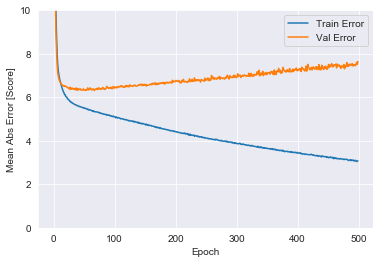

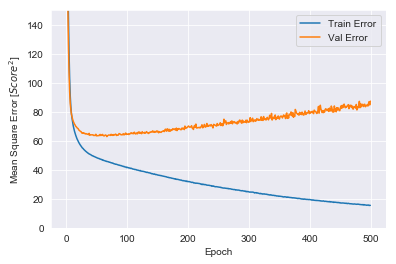

In [232]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Score]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,10])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Score^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,150])

plot_history(history)

In [233]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Score".format(mae))

Testing set Mean Abs Error:  7.07 Score



...................................................................

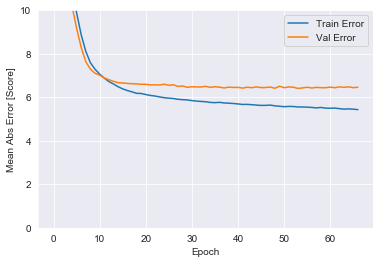

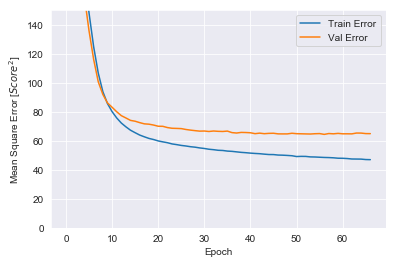

In [234]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [235]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Score".format(mae))

Testing set Mean Abs Error:  5.94 Score


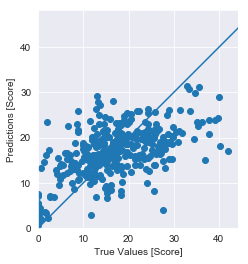

In [236]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Score]')
plt.ylabel('Predictions [Score]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

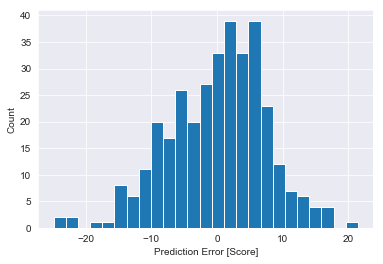

In [237]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Score]")
_ = plt.ylabel("Count")

In [238]:
def build_model():
  model = keras.Sequential([
    layers.Dense(40, activation=tf.nn.leaky_relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


...................

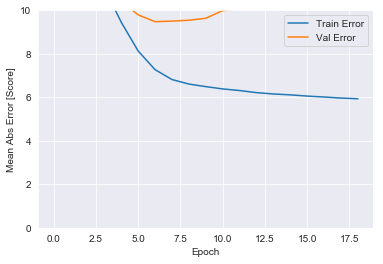

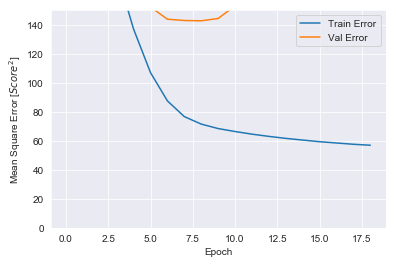

In [239]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_df, df_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [240]:
Offense = pd.read_csv('Input/Offense/Offense.csv')
Offense = Offense.set_index('Team')
Offense.head()


,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownConversions,ThirdDownAttempts,ThirdDownPercentage,RedZoneConversions,RedZoneAttempts,...,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PassingInterceptions,FirstDownsByPassing,PasserRating,RushingAttempts,RushingTouchdowns,FirstDownsByRushing,Score
Team,,,,,,,,,,,,,,,,,,,,,
SF,23.0,633,3565,5.6,216,48,121,39.7,15,32,...,7.0,11.3,17,12,119,85,283,6,71,230
CHI,29.9,561,3271,5.8,192,48,112,42.9,21,32,...,7.6,11.5,19,7,103,100,253,10,63,269
CIN,26.1,524,3038,5.8,183,37,96,38.5,21,27,...,6.9,10.8,18,10,119,89,185,8,47,235
BUF,13.7,634,2686,4.2,160,44,143,30.8,11,19,...,5.0,9.0,5,16,85,54,283,8,56,137
DEN,22.8,576,3394,5.9,189,41,116,35.3,14,26,...,6.8,10.7,12,10,107,83,221,10,65,205


In [241]:
Offense['Played'] = Offense['Score'] / Offense['PointsPerGame']

In [242]:
Offense['OffensivePlays'] = Offense['OffensivePlays'] / Offense['Played']
Offense['OffensiveYards'] = Offense['OffensiveYards'] / Offense['Played']
Offense['FirstDowns'] = Offense['FirstDowns'] / Offense['Played']
Offense['ThirdDownAttempts'] = Offense['ThirdDownAttempts'] / Offense['Played']
Offense['RedZoneAttempts'] = Offense['RedZoneAttempts'] / Offense['Played']
Offense['PassingAttempts'] = Offense['PassingAttempts'] / Offense['Played']
Offense['PassingYards'] = Offense['PassingYards'] / Offense['Played']
Offense['PassingTouchdowns'] = Offense['PassingTouchdowns'] / Offense['Played']

In [243]:
QBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'TimesSackedPercentage', 'OpponentQuarterbackHitsPercentage']]

In [244]:
RBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'OpponentTacklesForLossPercentage']]

In [245]:
WROffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'PassingAttempts', 'CompletionPercentage', 'PassingYards', 'TeamPassingYardsPerAttempt', \
                    'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating']]

In [246]:
Def = pd.read_csv('Input/Defense/Def.csv')
Def['Opponent'] = Def['Team']
Def = Def.drop('Team', axis=1)
Def = Def.set_index('Opponent')
Def.head()

,OpponentPointsPerGame,OpponentScore,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownConversions,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneConversions,...,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPassingInterceptions,OpponentFirstDownsByPassing,OpponentTimesSackedYards,OpponentPasserRating
Opponent,,,,,,,,,,,,,,,,,,,,,
SF,26.6,266,633,3442,5.4,203,50,133,37.6,23,...,356,60.4,2420,6.8,11.3,21,2,127,151,98
CHI,19.4,175,577,2876,5.0,164,43,125,34.4,13,...,337,62.6,2120,6.3,10.0,17,16,105,183,78
CIN,32.0,288,644,4091,6.4,238,73,130,56.2,24,...,368,66.8,2820,7.7,11.5,21,10,145,91,97
BUF,25.1,251,611,3022,4.9,187,50,131,38.2,21,...,334,64.4,2024,6.1,9.4,14,8,112,142,85
DEN,23.7,213,571,3276,5.7,169,45,120,37.5,17,...,297,63.0,2092,7.0,11.2,16,8,102,184,91


In [247]:
Def['Played'] = Def['OpponentScore'] / Def['OpponentPointsPerGame']

In [248]:
Def['OpponentOffensivePlays'] = Def['OpponentOffensivePlays'] / Def['Played']
Def['OpponentOffensiveYards'] = Def['OpponentOffensiveYards'] / Def['Played']
Def['OpponentFirstDowns'] = Def['OpponentFirstDowns'] / Def['Played']
Def['OpponentThirdDownAttempts'] = Def['OpponentThirdDownAttempts'] / Def['Played']
Def['OpponentRedZoneAttempts'] = Def['OpponentRedZoneAttempts'] / Def['Played']
Def['OpponentRushingYards'] = Def['OpponentRushingYards'] / Def['Played']
Def['OpponentPassingYards'] = Def['OpponentPassingYards'] / Def['Played']
Def['OpponentPassingTouchdowns'] = Def['OpponentPassingTouchdowns'] / Def['Played']
Def['OpponentRushingTouchdowns'] = Def['OpponentRushingTouchdowns'] / Def['Played']

In [249]:
QBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentTimesSackedPercentage', 'QuarterbackHitsPercentage', 'OpponentPassingAttempts', \
            'OpponentCompletionPercentage', 'OpponentPassingYards', 'OpponentPassingYardsPerAttempt', \
            'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns', 'OpponentPasserRating']]

In [250]:
RBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentRushingYards', 'OpponentRushingYardsPerAttempt', 'TacklesForLossPercentage', 'OpponentRushingTouchdowns']]

In [251]:
QB = pd.read_csv('Input/Aggregate/QBAggregate.csv')
QBavg = pd.DataFrame()

QBavg['Name'] = QB['Name']
QBavg['Team'] = QB['Team']
QBavg['Rank'] = QB['Rank']
QBavg['CompletionsGame'] = QB['PassingCompletions'] / QB['Played']
QBavg['AttemptsGame'] = QB['PassingAttempts'] / QB['Played']
QBavg['PassingCompletionPercentage'] = QB['PassingCompletionPercentage']
QBavg['YardsGame'] = QB['PassingYards'] / QB['Played']
QBavg['PassingYardsPerAttempt'] = QB['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QB['PassingTouchdowns'] / QB['Played']
QBavg['InterceptionsGame'] = QB['PassingInterceptions'] / QB['Played']
QBavg['PassingRating'] = QB['PassingRating']
QBavg['RushingAttemptsGame'] = QB['RushingAttempts'] / QB['Played']
QBavg['RushingYardsGame'] = QB['RushingYards'] / QB['Played']
QBavg['RushingYardsPerAttempt'] = QB['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QB['RushingTouchdowns'] / QB['Played']
QBavg['PointsGame'] = QB['FantasyPointsPerGameDraftKings']

QBavg = QBavg.set_index('Name')
QBavg.head()

,Team,Rank,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,RushingYardsPerAttempt,RushingTouchdownsGame,PointsGame
Name,,,,,,,,,,,,,,,
Patrick Mahomes,KC,1,23.333333,35.222222,66.2,322.333333,9.2,3.222222,0.777778,116.71,3.555556,15.222222,4.3,0.222222,30.5
Matt Ryan,ATL,2,26.625000,37.625000,70.8,335.625000,8.9,2.375000,0.375000,115.11,2.000000,8.375000,4.2,0.250000,27.1
Jared Goff,LAR,3,22.111111,32.555556,67.9,312.888889,9.6,2.222222,0.666667,112.95,3.111111,8.777778,2.8,0.000000,23.9
Deshaun Watson,HOU,4,20.555556,31.666667,64.9,265.444444,8.4,1.888889,0.777778,100.75,5.555556,29.777778,5.4,0.111111,22.2
Cam Newton,CAR,5,22.125000,32.875000,67.3,236.625000,7.2,1.875000,0.500000,100.83,9.125000,42.750000,4.7,0.500000,24.6


In [252]:
QBRZ = pd.read_csv('Input/RZ/QBRZ.csv')

QBRZavg = pd.DataFrame()

QBRZavg['Name'] = QBRZ['Name']
QBRZavg['RZCompletionsGame'] = QBRZ['PassingCompletions'] / QBRZ['Played']
QBRZavg['RZAttemptsGame'] = QBRZ['PassingAttempts'] / QBRZ['Played']
QBRZavg['RZPassingCompletionPercentage'] = QBRZ['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZ['PassingYards'] / QBRZ['Played']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZ['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZ['PassingTouchdowns'] / QBRZ['Played']
QBRZavg['RZInterceptionsGame'] = QBRZ['PassingInterceptions'] / QBRZ['Played']
QBRZavg['RZPassingRating'] = QBRZ['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZ['RushingAttempts'] / QBRZ['Played']
QBRZavg['RZRushingYardsGame'] = QBRZ['RushingYards'] / QBRZ['Played']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZ['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZ['RushingTouchdowns'] / QBRZ['Played']
QBRZavg['RZPointsGame'] = QBRZ['FantasyPointsPerGameDraftKings']

QBRZ = QBRZavg.set_index('Name')
QBRZ.head()

,RZCompletionsGame,RZAttemptsGame,RZPassingCompletionPercentage,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
Name,,,,,,,,,,,,,
Patrick Mahomes,4.000000,6.333333,63.2,32.222222,5.1,2.333333,0.111111,108.19,1.000000,3.222222,3.2,0.222222,12.2
Andrew Luck,4.375000,7.375000,59.3,33.500000,4.5,2.375000,0.125000,102.97,0.250000,0.875000,3.5,0.000000,11.3
Cam Newton,2.625000,3.625000,72.4,19.750000,5.4,1.375000,0.000000,124.71,1.625000,6.125000,3.8,0.500000,10.4
Drew Brees,5.000000,7.375000,67.8,29.500000,4.0,1.750000,0.000000,114.83,0.500000,1.375000,2.8,0.250000,10.1
Deshaun Watson,2.777778,5.555556,50.0,18.666667,3.4,1.444444,0.000000,97.33,1.333333,7.000000,5.2,0.111111,7.9


In [254]:
QBsnaps = pd.read_csv('Input/Snaps/QBSnaps.csv')
QBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Jeff Driskel,CIN,QB,2,16,8.0,2.9,18.8,0.0,62.5,62.5,13.36,83.5
1,2,Patrick Mahomes,KC,QB,10,643,64.3,100.0,5.6,0.0,59.3,59.3,294.80,45.8
2,3,Ryan Fitzpatrick,TB,QB,7,387,55.3,59.9,8.3,0.0,66.4,66.4,179.76,46.4
3,4,Cam Newton,CAR,QB,9,568,63.1,98.8,13.2,0.0,64.6,64.6,212.64,37.4
4,5,Matt Ryan,ATL,QB,9,609,67.7,98.5,3.1,0.0,61.1,61.1,241.60,39.7


In [255]:
QBsnaps = QBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
QBsnaps = QBsnaps.set_index('Name')

In [256]:
Defense = pd.read_csv('Input/Defense/Defense.csv')
QBDef = pd.DataFrame()
QBDef['Team'] = Defense['Team']
QBDef['DPointsAllowed'] = Defense['DraftKingsQuarterbackFantasyPointsAllowedAverage']
QBDef = QBDef.set_index('Team')
QBDef.head()

,DPointsAllowed
Team,
JAX,16.66
BAL,17.40
DAL,18.23
SEA,16.26
TEN,17.66


In [257]:
QBSalaries = pd.read_csv('Input/Salaries/QBSalaries.csv').dropna()
QBSalaries = QBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
QBSalaries = QBSalaries.set_index('Opponent')
QBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
ARI,Patrick Mahomes,KC,7200.0,27.10
CIN,Drew Brees,NO,6300.0,24.86
OAK,Philip Rivers,LAC,6000.0,24.57
CLE,Matt Ryan,ATL,6200.0,24.33
CAR,Ben Roethlisberger,PIT,6300.0,24.06


In [258]:
Vegas = pd.read_csv('Input/Vegas/Veg.csv')
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2
Vegas = Vegas.set_index('Team')
Vegas.head()

,Home,PointSpread,OverUnder,total
Team,,,,
PIT,True,-4.0,51.5,27.75
TB,True,-3.0,51.5,27.25
NE,False,-6.5,46.5,26.50
CHI,True,-6.5,45.0,25.75
NO,False,-4.5,54.0,29.25


In [259]:
QBSalaries = QBSalaries.join(QBDef).join(QBDefense)
QBSalaries = QBSalaries.set_index('Team').join(Vegas).join(QBOffense)
QBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Josh Rosen,4800.0,14.46,23.13,24.0,69.0,410.7,6.0,25.7,12.1,...,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,8.6,22.2
ARI,Mike Glennon,4500.0,0.17,23.13,24.0,69.0,410.7,6.0,25.7,12.1,...,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,8.6,22.2
ATL,Matt Ryan,6200.0,24.33,19.92,26.3,72.3,419.7,5.8,24.4,13.3,...,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,6.2,16.4
ATL,Matt Schaub,4400.0,0.06,19.92,26.3,72.3,419.7,5.8,24.4,13.3,...,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,6.2,16.4
BUF,Derek Anderson,4300.0,7.02,18.88,25.4,66.9,361.6,5.4,19.8,14.4,...,63.400000,268.600000,4.2,16.000000,14.300000,30.8,1.900000,57.9,9.7,18.5


In [260]:
QBSalaries = QBSalaries.set_index('Name')
QBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4800.0,14.46,23.13,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,8.6,22.2
Mike Glennon,4500.0,0.17,23.13,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,8.6,22.2
Matt Ryan,6200.0,24.33,19.92,26.3,72.3,419.7,5.8,24.4,13.3,36.8,...,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,6.2,16.4
Matt Schaub,4400.0,0.06,19.92,26.3,72.3,419.7,5.8,24.4,13.3,36.8,...,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,6.2,16.4
Derek Anderson,4300.0,7.02,18.88,25.4,66.9,361.6,5.4,19.8,14.4,33.3,...,63.400000,268.600000,4.2,16.000000,14.300000,30.8,1.900000,57.9,9.7,18.5


In [261]:
QBs = QBSalaries.join(QBavg).join(QBRZ).join(QBsnaps).dropna()
QBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4800.0,14.46,23.13,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,0.0,0.00,2.8,55.3,74.1,2.6,0.0,56.3,56.3,18.6
Matt Ryan,6200.0,24.33,19.92,26.3,72.3,419.7,5.8,24.4,13.3,36.8,...,4.5,0.25,8.5,67.7,98.5,3.1,0.0,61.1,61.1,39.7
Matt Schaub,4400.0,0.06,19.92,26.3,72.3,419.7,5.8,24.4,13.3,36.8,...,0.0,0.00,0.0,5.0,1.6,10.0,10.0,90.0,90.0,11.0
Derek Anderson,4300.0,7.02,18.88,25.4,66.9,361.6,5.4,19.8,14.4,33.3,...,0.0,0.00,0.1,59.0,41.5,0.8,0.0,60.2,60.2,10.6
Josh Allen,4500.0,4.58,18.88,25.4,66.9,361.6,5.4,19.8,14.4,33.3,...,6.1,0.50,4.6,53.7,53.1,10.9,0.0,54.0,54.0,21.4


In [262]:
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test

,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,23.13,24.0,69.000000,410.700000,6.0,25.700000,12.100000,36.4,3.300000,69.7,...,0.0,0.000000,2.8,55.3,74.1,2.6,0.0,56.3,56.3,18.6
Matt Ryan,19.92,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,3.600000,66.7,...,4.5,0.250000,8.5,67.7,98.5,3.1,0.0,61.1,61.1,39.7
Matt Schaub,19.92,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,3.600000,66.7,...,0.0,0.000000,0.0,5.0,1.6,10.0,10.0,90.0,90.0,11.0
Derek Anderson,18.88,25.4,66.900000,361.600000,5.4,19.800000,14.400000,33.3,3.200000,50.0,...,0.0,0.000000,0.1,59.0,41.5,0.8,0.0,60.2,60.2,10.6
Josh Allen,18.88,25.4,66.900000,361.600000,5.4,19.800000,14.400000,33.3,3.200000,50.0,...,6.1,0.500000,4.6,53.7,53.1,10.9,0.0,54.0,54.0,21.4
Nathan Peterman,18.88,25.4,66.900000,361.600000,5.4,19.800000,14.400000,33.3,3.200000,50.0,...,1.0,0.250000,2.8,37.0,22.4,6.8,0.0,61.5,61.5,13.4
Cam Newton,22.87,23.2,64.493780,335.789474,5.2,21.312919,12.321531,36.9,3.219139,55.2,...,3.8,0.500000,10.4,63.1,98.8,13.2,0.0,64.6,64.6,37.4
Taylor Heinicke,22.87,23.2,64.493780,335.789474,5.2,21.312919,12.321531,36.9,3.219139,55.2,...,0.0,0.000000,0.0,3.0,1.0,33.3,0.0,50.0,50.0,5.3
Mitch Trubisky,17.76,27.1,57.865164,361.962705,6.3,20.547131,10.773361,39.2,3.220902,55.2,...,5.3,0.250000,8.8,65.8,99.2,6.9,0.0,55.9,55.9,37.7


In [263]:
columns = train.drop('Score', axis=1)
X_test = X_test[columns.columns]

In [264]:
normed_x_test = norm(X_test)

In [265]:
new_predictions = model.predict(normed_x_test).flatten()

In [266]:
new_predictions

array([  6.7204847 ,   4.262082  , -20.123882  ,   7.904843  ,
         9.436121  ,   3.3975766 ,   9.0404415 ,  -0.78174394,
        16.108194  ,  -3.9092367 ,  12.9073305 ,   6.90727   ,
        12.175801  ,  12.909083  ,   2.6668475 ,  -3.7712095 ,
         1.5787063 ,  -1.0069995 ,   9.866008  ,   0.09924299,
         6.315677  ,  -4.835793  ,   9.557453  ,  -4.1195884 ,
        10.598571  ,  16.930883  ,   4.9592257 ,   9.250396  ,
        -6.749891  ,   1.3980491 ,   1.6839223 ,   3.929278  ,
        -5.617031  ,  18.463644  ,   5.1053624 ,  -0.4429534 ,
         0.80845875,  -0.4510278 ,  -1.5434663 ,  -2.2428505 ,
         2.8755574 ,  -6.48511   ,  11.820208  ,   6.76851   ,
         1.0871055 ,  -0.10682291,  -2.3341691 ,   2.0325387 ,
         2.3464522 ,   3.510811  ,   4.825085  ,  -1.7186031 ,
        16.912111  ], dtype=float32)

In [267]:
QBs['DNN'] = new_predictions

In [269]:
X_train = QBtrain.drop(['Score', 'Name', 'SnapsPlayed'], axis=1).astype('float64')
y_train = QBtrain.Score
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test = X_test[X_train.columns]

In [270]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [271]:
QBNe = neigh.predict(X_test)

In [272]:
QBs['NeProjections'] = QBNe

In [273]:
QBScores = pd.read_csv('Scores/QBScores.csv')
QB = pd.DataFrame({'Name': [], 'Score': []})
QB['Name'] = QBScores['Name']
QB['Score'] = QBScores['FantasyPointsDraftKings']
QB = QB.set_index('Name')
QBs = QBs.join(QB)
QBs = QBs.dropna()
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4800.0,14.46,23.13,24.0,69.000000,410.700000,6.0,25.700000,12.100000,36.4,...,55.3,74.1,2.6,0.0,56.3,56.3,18.6,6.720485,9.328,10.22
Matt Ryan,6200.0,24.33,19.92,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,...,67.7,98.5,3.1,0.0,61.1,61.1,39.7,4.262082,21.632,24.50
Cam Newton,6100.0,22.75,22.87,23.2,64.493780,335.789474,5.2,21.312919,12.321531,36.9,...,63.1,98.8,13.2,0.0,64.6,64.6,37.4,9.040442,22.280,15.72
Taylor Heinicke,4000.0,0.02,22.87,23.2,64.493780,335.789474,5.2,21.312919,12.321531,36.9,...,3.0,1.0,33.3,0.0,50.0,50.0,5.3,-0.781744,2.524,0.00
Mitch Trubisky,5600.0,21.31,17.76,27.1,57.865164,361.962705,6.3,20.547131,10.773361,39.2,...,65.8,99.2,6.9,0.0,55.9,55.9,37.7,16.108194,24.688,39.00
Andy Dalton,5800.0,20.09,27.49,25.8,59.384483,376.546552,6.3,21.574138,10.564655,40.0,...,60.2,97.3,2.2,0.0,59.8,59.8,30.1,12.907331,18.448,8.92
Jeff Driskel,4400.0,0.05,27.49,25.8,59.384483,376.546552,6.3,21.574138,10.564655,40.0,...,8.0,2.9,18.8,0.0,62.5,62.5,83.5,6.907270,13.276,11.30
Baker Mayfield,5400.0,17.99,27.00,28.2,63.283465,414.007087,6.5,24.314173,11.768504,51.9,...,67.4,74.4,3.9,0.2,56.8,57.0,26.1,12.175801,22.796,22.64
Dak Prescott,4900.0,16.95,20.73,20.3,62.120219,358.633333,5.8,18.192350,13.200546,35.3,...,63.3,99.0,8.4,0.2,56.3,56.5,27.7,2.666847,13.800,21.70


In [274]:
y_test = QBs.Score
y_pred = QBs.DNN
mean_squared_error(y_test, y_pred)

188.98307088769576

In [275]:
y_test = QBs.Score
y_pred = QBs.NeProjections
mean_squared_error(y_test, y_pred)

40.76853200000001

In [302]:
RBtrain = RBtrain.dropna(axis=1)
RBtrain = RBtrain.drop(['Unnamed: 0', 'SnapsPlayed'], axis=1)
RBtrain.head()

,Name,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
0,Justin Forsett,17.333333,76.166667,3.983333,0.166667,5.333333,3.833333,21.500000,0.000000,15.600000,...,5.2,17.75,13.125,35.7,2.9375,55.3,91.25,3.9,21.7,0.5625
1,Kyle Juszczyk,0.000000,0.000000,0.000000,0.000000,2.833333,2.166667,15.833333,0.166667,4.750000,...,5.2,17.75,13.125,35.7,2.9375,55.3,91.25,3.9,21.7,0.5625
2,Javorius Allen,5.000000,22.833333,4.416667,0.000000,1.000000,0.500000,2.333333,0.000000,3.016667,...,5.2,17.75,13.125,35.7,2.9375,55.3,91.25,3.9,21.7,0.5625
3,Matt Forte,24.000000,141.000000,5.900000,1.000000,8.000000,5.000000,25.000000,0.000000,30.600000,...,5.2,17.75,13.125,35.7,2.9375,55.3,91.25,3.9,21.7,0.5625
4,Jeremy Langford,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,5.2,17.75,13.125,35.7,2.9375,55.3,91.25,3.9,21.7,0.5625


In [303]:
RBtrain = RBtrain.set_index('Name')

In [278]:
RBtrain.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
count,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,...,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000
mean,5.871217,24.086284,2.652937,0.166925,1.883260,1.408554,11.584711,0.054780,6.443740,6.771313,...,5.449731,19.998981,13.222271,39.099067,3.123039,55.309652,109.854000,4.165357,19.034212,0.789230
std,6.137001,26.949481,2.126778,0.289602,1.949951,1.510511,13.791354,0.136357,6.495214,8.275762,...,0.409285,1.760891,0.816098,4.113357,0.443921,8.317406,16.114031,0.399574,4.168763,0.265269
min,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,-0.700000,-1.800000,...,4.400000,16.062500,10.564655,25.200000,1.750000,34.800000,79.187500,3.300000,10.100000,0.221714
25%,0.500000,1.000000,0.650000,0.000000,0.333333,0.181818,0.900000,0.000000,0.861667,0.000000,...,5.200000,18.804225,12.812500,36.800000,2.812500,50.000000,98.187500,3.900000,16.200000,0.625000
50%,3.577381,14.000000,2.903571,0.000000,1.250000,1.000000,6.666667,0.000000,4.600000,3.700000,...,5.450000,19.937500,13.250000,39.000000,3.187500,55.300000,109.250000,4.100000,19.000000,0.750000
75%,10.125000,40.142857,4.000000,0.250000,3.000000,2.200000,17.925595,0.000000,10.183333,10.500000,...,5.700000,20.937500,13.812500,41.000000,3.437500,60.000000,120.875000,4.400000,21.600000,0.937500
max,31.000000,168.000000,28.000000,3.000000,13.000000,10.000000,129.000000,2.000000,49.600000,55.600000,...,6.700000,26.444444,15.062500,56.200000,4.125000,87.500000,165.812500,5.200000,33.000000,1.562500


In [279]:
RB = pd.read_csv('Input/Aggregate/RBAggregate.csv')
RBavg = pd.DataFrame()
RBavg['Name'] = RB['Name']
RBavg['Team'] = RB['Team']
RBavg['Rank'] = RB['Rank']
RBavg['RushesGame'] = RB['RushingAttempts'] / RB['Played']
RBavg['RushYardGame'] = RB['RushingYards'] / RB['Played']
RBavg['YardAttempt'] = RB['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RB['RushingTouchdowns'] / RB['Played']
RBavg['TargetsGame'] = RB['ReceivingTargets'] / RB['Played']
RBavg['RecGame'] = RB['Receptions'] / RB['Played']
RBavg['RecYardsGame'] = RB['ReceivingYards'] / RB['Played']
RBavg['RecTdGame'] = RB['ReceivingTouchdowns'] / RB['Played']
RBavg['PointsGame'] = RB['FantasyPointsPerGameDraftKings']
RBavg = RBavg.set_index('Name')
RBavg.head()

,Team,Rank,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame
Name,,,,,,,,,,,
Todd Gurley,LAR,1,20.222222,96.444444,4.8,1.333333,5.444444,4.111111,40.222222,0.444444,30.3
Alvin Kamara,NO,2,13.875000,61.250000,4.4,1.125000,8.250000,6.375000,53.375000,0.375000,28.5
James Conner,PIT,3,18.875000,88.250000,4.7,1.125000,6.250000,4.750000,47.375000,0.125000,28.1
Saquon Barkley,NYG,4,13.875000,64.875000,4.7,0.625000,8.875000,7.250000,62.125000,0.250000,26.2
Kareem Hunt,KC,5,16.777778,75.888889,4.5,0.777778,3.222222,2.333333,34.666667,0.666667,22.7


In [280]:
RB_RZ = pd.read_csv('Input/RZ/RBRZ.csv')
RBRZavg = pd.DataFrame()
RBRZavg['Name'] = RB_RZ['Name']
RBRZavg['RZattemptsGame'] = RB_RZ['RushingAttempts'] / RB_RZ['Played']
RBRZavg['RZyardsGame'] = RB_RZ['RushingYards'] / RB_RZ['Played']
RBRZavg['RZYardAtt'] = RB_RZ['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RB_RZ['RushingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZTarGame'] = RB_RZ['ReceivingTargets'] / RB_RZ['Played']
RBRZavg['RZRecGame'] = RB_RZ['Receptions'] / RB_RZ['Played']
RBRZavg['RZRecYarGame'] = RB_RZ['ReceivingYards'] / RB_RZ['Played']
RBRZavg['RZRecTDGame'] = RB_RZ['ReceivingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZPointsGame'] = RB_RZ['FantasyPointsPerGameDraftKings']
RBRZ = RBRZavg.set_index('Name')
RBRZ.head()

,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
Name,,,,,,,,,
Todd Gurley,5.555556,15.666667,2.8,1.333333,1.444444,0.777778,7.222222,0.333333,13.7
Alvin Kamara,4.125000,12.000000,2.9,1.000000,2.375000,1.875000,12.625000,0.375000,13.1
Melvin Gordon,2.285714,13.428571,5.9,0.857143,1.428571,0.857143,4.714286,0.428571,11.0
Kareem Hunt,2.555556,8.222222,3.2,0.777778,0.888889,0.555556,4.222222,0.333333,8.5
James White,1.666667,2.888889,1.7,0.333333,1.555556,1.111111,7.666667,0.666667,8.2


In [282]:
RBsnaps = pd.read_csv('Input/Snaps/RBSnaps.csv')
RBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Zach Zenner,DET,RB,1,2,2.0,2.6,50.0,0.0,50.0,50.0,1.2,60.0
1,2,Nick Chubb,CLE,RB,10,188,18.8,26.0,50.0,5.3,53.2,55.3,110.7,58.9
2,3,Melvin Gordon,LAC,RB,8,360,45.0,73.5,34.7,14.4,44.7,49.2,221.3,61.5
3,4,Kenneth Dixon,BAL,RB,1,22,22.0,27.5,59.1,0.0,59.1,59.1,10.4,47.3
4,5,Marlon Mack,IND,RB,5,161,32.2,48.9,48.4,8.1,53.4,56.5,89.5,55.6


In [283]:
RBsnaps = RBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
RBsnaps = RBsnaps.set_index('Name')

In [284]:
RBDef = pd.DataFrame()
RBDef['Team'] = Defense['Team']
RBDef['DPointsAllowed'] = Defense['DraftKingsRunningbackFantasyPointsAllowedAverage']
RBDef = RBDef.set_index('Team')
RBDef.head()

,DPointsAllowed
Team,
JAX,20.91
BAL,17.57
DAL,23.80
SEA,22.98
TEN,17.70


In [285]:
RBSalaries = pd.read_csv('Input/Salaries/RBSalaries.csv').dropna()
RBSalaries = RBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
RBSalaries = RBSalaries.set_index('Opponent')
RBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
SEA,Todd Gurley,LAR,9400.0,25.23
SF,Saquon Barkley,NYG,8600.0,23.82
CIN,Alvin Kamara,NO,8700.0,23.50
OAK,Melvin Gordon,LAC,9000.0,23.08
CAR,James Conner,PIT,8300.0,22.19


In [286]:
RBSalaries = RBSalaries.join(RBDef).join(RBDefense)
RBSalaries = RBSalaries.set_index('Team').join(Vegas).join(RBOffense)
RBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,David Johnson,6800.0,17.62,34.99,24.0,69.0,410.7,6.0,25.7,12.1,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
ARI,Chase Edmonds,4100.0,3.56,34.99,24.0,69.0,410.7,6.0,25.7,12.1,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
ARI,Derrick Coleman,3000.0,0.30,34.99,24.0,69.0,410.7,6.0,25.7,12.1,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
ARI,TJ Logan,3000.0,0.25,34.99,24.0,69.0,410.7,6.0,25.7,12.1,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
ATL,Tevin Coleman,5400.0,15.07,32.33,26.3,72.3,419.7,5.8,24.4,13.3,...,27.1,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,31.5


In [287]:
RBSalaries = RBSalaries.set_index('Name')
RBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,6800.0,17.62,34.99,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
Chase Edmonds,4100.0,3.56,34.99,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
Derrick Coleman,3000.0,0.30,34.99,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
TJ Logan,3000.0,0.25,34.99,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
Tevin Coleman,5400.0,15.07,32.33,26.3,72.3,419.7,5.8,24.4,13.3,36.8,...,27.1,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,31.5


In [288]:
RBs = RBSalaries.join(RBavg).join(RBRZ).join(RBsnaps).dropna()
RBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRecYarGame,RZRecTDGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,6800.0,17.62,34.99,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,0.375,0.000,4.6,47.7,82.2,33.3,10.0,40.6,43.4,36.2
Chase Edmonds,4100.0,3.56,34.99,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,0.000,0.000,0.0,11.2,19.3,23.8,14.9,36.6,38.6,25.8
Derrick Coleman,3000.0,0.30,34.99,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,0.000,0.000,0.0,4.6,7.9,4.9,4.9,9.8,9.8,9.8
TJ Logan,3000.0,0.25,34.99,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,0.000,0.000,0.0,1.3,2.2,0.0,50.0,50.0,50.0,85.0
Tevin Coleman,5400.0,15.07,32.33,26.3,72.3,419.7,5.8,24.4,13.3,36.8,...,5.125,0.375,4.6,40.0,58.3,29.4,8.3,35.8,37.8,35.7


In [304]:
RB_train = RBtrain.drop('Home', axis=1)

In [305]:
train_dataset = RB_train.sample(frac=0.8,random_state=0)
test_dataset = RB_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
RushesGame,4459.0,5.859456,6.119094,0.000000,0.500000,3.600000,10.000000,31.000000
RushYardGame,4459.0,23.991172,26.787424,-8.000000,1.111111,14.000000,39.923077,168.000000
YardAttempt,4459.0,2.663235,2.154201,-8.000000,0.666667,2.927273,4.000000,28.000000
RushTdGame,4459.0,0.166906,0.288836,0.000000,0.000000,0.000000,0.250000,3.000000
TargetsGame,4459.0,1.873136,1.944650,0.000000,0.333333,1.250000,2.888889,13.000000
RecGame,4459.0,1.398971,1.506523,0.000000,0.181818,1.000000,2.142857,10.000000
RecYardsGame,4459.0,11.496073,13.760698,-5.000000,0.925824,6.545455,17.557692,129.000000
RecTdGame,4459.0,0.054022,0.134591,0.000000,0.000000,0.000000,0.000000,2.000000
PointsGame,4459.0,6.408535,6.447771,-0.700000,0.875000,4.587500,10.108333,46.100000
RZattemptsGame,4459.0,0.889604,1.121028,0.000000,0.000000,0.444444,1.444444,8.000000


In [306]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
RB_labels = RB_train.pop('Score')

In [307]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_RB = norm(RB_train)

In [308]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 41        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [310]:

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [311]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
495,56.636365,5.458519,56.636365,19.069659,3.164386,19.069659,495
496,57.197976,5.418602,57.197976,19.217777,3.201807,19.217777,496
497,55.566419,5.357772,55.566419,19.091315,3.161210,19.091315,497
498,58.476737,5.481042,58.476737,18.977790,3.178283,18.977790,498
499,56.199566,5.396561,56.199566,19.053910,3.165110,19.053910,499


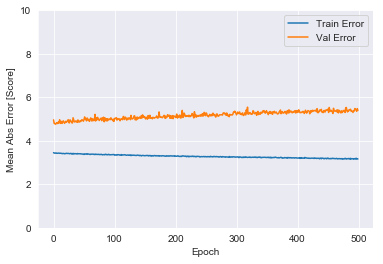

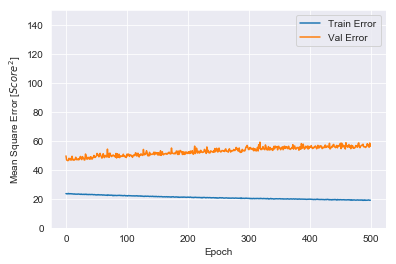

In [312]:
plot_history(history)


..........................................

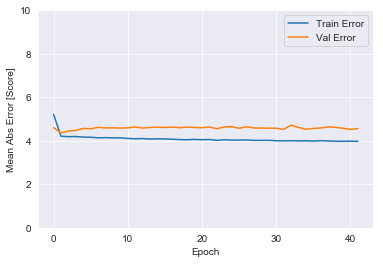

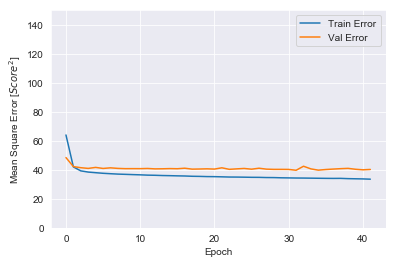

In [313]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_RB, RB_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [314]:
X_test = RBs[RB_train.columns]

In [315]:
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
RBs['DNN'] = new_predictions

In [316]:
X_train = RBtrain.drop('Score', axis=1).astype('float64')
y_train = RBtrain.Score

In [317]:
X_test = RBs[X_train.columns]

In [318]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [319]:
RBNe = neigh.predict(X_test)
RBs['NeProjections'] = RBNe

In [320]:
RBScores = pd.read_csv('Scores/RBScores.csv')
RB = pd.DataFrame({'Name': [], 'Score': []})
RB['Name'] = RBScores['Name']
RB['Score'] = RBScores['FantasyPointsDraftKings']
RB = RB.set_index('Name')
RBs = RBs.join(RB)
RBs = RBs.dropna()
RBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,6800.0,17.62,34.99,24.0,69.000000,410.700000,6.0,25.700000,12.100000,36.4,...,47.7,82.2,33.3,10.0,40.6,43.4,36.2,16.253836,10.78,37.3
Chase Edmonds,4100.0,3.56,34.99,24.0,69.000000,410.700000,6.0,25.700000,12.100000,36.4,...,11.2,19.3,23.8,14.9,36.6,38.6,25.8,6.198650,4.14,0.7
Derrick Coleman,3000.0,0.30,34.99,24.0,69.000000,410.700000,6.0,25.700000,12.100000,36.4,...,4.6,7.9,4.9,4.9,9.8,9.8,9.8,3.297530,0.38,0.0
TJ Logan,3000.0,0.25,34.99,24.0,69.000000,410.700000,6.0,25.700000,12.100000,36.4,...,1.3,2.2,0.0,50.0,50.0,50.0,85.0,-1.022245,2.70,3.4
Tevin Coleman,5400.0,15.07,32.33,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,...,40.0,58.3,29.4,8.3,35.8,37.8,35.7,17.862770,16.04,9.3
Ito Smith,3700.0,9.81,32.33,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,...,19.9,29.0,29.6,11.2,39.1,40.8,39.8,12.783993,15.52,6.6
Brian Hill,3000.0,0.17,32.33,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.537007,0.34,0.0
LeSean McCoy,4500.0,12.07,24.61,25.4,66.900000,361.600000,5.4,19.800000,14.400000,33.3,...,36.3,55.0,33.9,10.4,41.3,44.3,29.4,9.934827,5.80,27.8
Marcus Murphy,3300.0,1.72,24.61,25.4,66.900000,361.600000,5.4,19.800000,14.400000,33.3,...,18.4,27.0,27.9,14.0,35.7,41.9,24.5,6.649608,6.86,6.9


In [321]:
y_test = RBs.Score
y_pred = RBs.DNN
mean_squared_error(y_test, y_pred)

66.8330242869878

In [322]:
y_test = RBs.Score
y_pred = RBs.NeProjections
mean_squared_error(y_test, y_pred)

71.79439583333334

In [325]:
WRtrain = WRtrain.dropna(axis=1)
WRtrain = WRtrain.drop(['Unnamed: 0', 'SnapsPlayed'], axis=1)
WRtrain.head()

,Name,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Steve Smith,11.400000,7.200000,58.940000,102.000000,0.600000,7.860000,12.280000,0.0,0.0,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
1,Marlon Brown,3.833333,1.666667,48.333333,14.000000,0.000000,4.283333,7.750000,0.0,0.0,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
2,Kamar Aiken,5.833333,3.000000,43.000000,44.166667,0.333333,5.816667,9.833333,0.0,0.0,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
3,Jeremy Ross,3.500000,2.500000,80.000000,29.000000,0.000000,9.400000,11.650000,0.5,1.0,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
4,Darren Waller,1.200000,0.400000,20.000000,3.600000,0.000000,1.800000,3.600000,0.0,0.0,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79


In [326]:
WR = pd.read_csv('Input/Aggregate/WRAggregate.csv')
WRavg = pd.DataFrame()
WRavg['Name'] = WR['Name']
WRavg['Rank'] = WR['Rank']
WRavg['Team'] = WR['Team']
WRavg['TargetsGame'] = WR['ReceivingTargets'] / WR['Played']
WRavg['RecGame'] = WR['Receptions'] / WR['Played']
WRavg['RecPercentage'] = WR['ReceptionPercentage']
WRavg['RecYardsGame'] = WR['ReceivingYards'] / WR['Played']
WRavg['RecTdGame'] = WR['ReceivingTouchdowns'] / WR['Played']
WRavg['YardsTarget'] = WR['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WR['ReceivingYardsPerReception']
WRavg['RushesGame'] = WR['RushingAttempts'] / WR['Played']
WRavg['RushYardsGame'] = WR['RushingYards'] / WR['Played']
WRavg['YardAttempt'] = WR['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WR['RushingTouchdowns']
WRavg['PointsGame'] = WR['FantasyPointsPerGameDraftKings']
WRavg = WRavg.set_index('Name')
WRavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Adam Thielen,1,MIN,11.666667,8.666667,74.3,105.222222,0.777778,9.0,12.1,0.222222,2.222222,10.0,0,26.6
DeAndre Hopkins,2,HOU,10.000000,7.000000,70.0,99.333333,0.777778,9.9,14.2,0.111111,-0.777778,-7.0,0,22.7
Michael Thomas,3,NO,9.875000,8.750000,88.6,110.000000,0.625000,11.1,12.6,0.000000,0.000000,0.0,0,24.4
Tyreek Hill,4,KC,7.777778,5.333333,68.6,86.000000,0.777778,11.1,16.1,1.333333,6.777778,5.1,0,20.6
Davante Adams,5,GB,10.875000,7.250000,66.7,91.250000,0.875000,8.4,12.6,0.000000,0.000000,0.0,0,22.8


In [327]:
WRRZ = pd.read_csv('Input/RZ/WRRZ.csv')
WRRZavg = pd.DataFrame()
WRRZavg['Name'] = WRRZ['Name']
WRRZavg['RZTargetsGame'] = WRRZ['ReceivingTargets'] / WRRZ['Played']
WRRZavg['RZRecGame'] = WRRZ['Receptions'] / WRRZ['Played']
WRRZavg['RZRecPercentage'] = WRRZ['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZ['ReceivingYards'] / WRRZ['Played']
WRRZavg['RZRecTdGame'] = WRRZ['ReceivingTouchdowns'] / WRRZ['Played']
WRRZavg['RZYardsTarget'] = WRRZ['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZ['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZ['RushingAttempts'] / WRRZ['Played']
WRRZavg['RZRushYardsGame'] = WRRZ['RushingYards'] / WRRZ['Played']
WRRZavg['RZYardAttempt'] = WRRZ['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZ['RushingTouchdowns'] / WRRZ['Played']
WRRZavg['RZPointsGame'] = WRRZ['FantasyPointsPerGameDraftKings']
WRRZ = WRRZavg.set_index('Name')
WRRZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Davante Adams,2.125000,1.000000,47.1,8.500000,0.875000,4.0,8.5,0.0,0.0,0.0,0.0,7.1
DeAndre Hopkins,1.666667,1.000000,60.0,7.666667,0.555556,4.6,7.7,0.0,0.0,0.0,0.0,5.1
Michael Thomas,1.875000,1.500000,80.0,9.875000,0.500000,5.3,6.6,0.0,0.0,0.0,0.0,5.5
Adam Thielen,1.666667,1.222222,73.3,6.555556,0.444444,3.9,5.4,0.0,0.0,0.0,0.0,4.4
Tyler Boyd,1.000000,1.000000,100.0,8.250000,0.500000,8.2,8.2,0.0,0.0,0.0,0.0,4.8


In [329]:
WRsnaps = pd.read_csv('Input/Snaps/WRSnaps.csv')
WRsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Tim White,BAL,WR,3,2,0.7,0.8,0.0,50.0,50.0,50.0,2.4,120.0
1,2,Isaiah McKenzie,BUF,WR,2,10,5.0,6.8,30.0,10.0,40.0,40.0,5.6,56.0
2,3,Curtis Samuel,CAR,WR,6,96,16.0,21.8,4.2,16.7,16.7,20.8,51.7,53.9
3,4,Brandon Zylstra,MIN,WR,9,6,0.7,1.0,0.0,16.7,16.7,16.7,3.3,55.0
4,5,Aldrick Robinson,MIN,WR,7,89,12.7,19.2,0.0,14.6,7.9,14.6,36.5,41.0


In [330]:
WRsnaps = WRsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
WRsnaps = WRsnaps.set_index('Name')

In [331]:
WRDef = pd.DataFrame()
WRDef['Team'] = Defense['Team']
WRDef['DPointsAllowed'] = Defense['DraftKingsWideReceiverFantasyPointsAllowedAverage']
WRDef = WRDef.set_index('Team')
WRDef.head()

,DPointsAllowed
Team,
JAX,29.54
BAL,32.91
DAL,29.25
SEA,38.40
TEN,41.72


In [332]:
WRSalaries = pd.read_csv('Input/Salaries/WRSalaries.csv').dropna()
WRSalaries = WRSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
WRSalaries = WRSalaries.set_index('Opponent')
WRSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
CIN,Michael Thomas,NO,8100.0,25.82
CLE,Julio Jones,ATL,8300.0,23.61
CAR,Antonio Brown,PIT,8500.0,21.13
MIA,Davante Adams,GB,7800.0,20.93
SF,Odell Beckham Jr,NYG,7900.0,20.00


In [333]:
WRSalaries = WRSalaries.join(WRDef).join(QBDefense)
WRSalaries = WRSalaries.set_index('Team').join(Vegas).join(WROffense)
WRSalaries.head()


,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Larry Fitzgerald,5400.0,12.65,38.69,24.0,69.0,410.7,6.0,25.7,12.1,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,Christian Kirk,4900.0,11.33,38.69,24.0,69.0,410.7,6.0,25.7,12.1,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,Chad Williams,3000.0,4.93,38.69,24.0,69.0,410.7,6.0,25.7,12.1,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,JJ Nelson,3000.0,2.66,38.69,24.0,69.0,410.7,6.0,25.7,12.1,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,Trent Sherfield,3000.0,0.30,38.69,24.0,69.0,410.7,6.0,25.7,12.1,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64


In [334]:
WRSalaries = WRSalaries.set_index('Name')
WRSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5400.0,12.65,38.69,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Christian Kirk,4900.0,11.33,38.69,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Chad Williams,3000.0,4.93,38.69,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
JJ Nelson,3000.0,2.66,38.69,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Trent Sherfield,3000.0,0.30,38.69,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64


In [335]:
WRs = WRSalaries.join(WRavg).join(WRRZ).join(WRsnaps).dropna()
WRs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5400.0,12.65,38.69,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,0.0,0.0,2.9,52.1,89.8,0.0,13.9,8.5,13.9,20.8
Christian Kirk,4900.0,11.33,38.69,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,5.0,0.0,1.2,44.2,76.2,0.5,12.6,8.8,13.1,22.1
Chad Williams,3000.0,4.93,38.69,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,0.0,0.0,0.2,43.8,67.0,0.0,8.9,3.1,8.9,8.1
JJ Nelson,3000.0,2.66,38.69,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,0.0,0.0,0.0,11.4,19.7,2.9,10.7,6.8,13.6,6.4
Trent Sherfield,3000.0,0.30,38.69,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,0.0,0.0,0.0,7.7,11.0,0.0,0.0,0.0,0.0,0.0


In [336]:
WRtrain = WRtrain.set_index('Name')

In [337]:
WR_train = WRtrain.drop('Home', axis=1)

train_dataset = WR_train.sample(frac=0.8,random_state=0)
test_dataset = WR_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TargetsGame,4595.0,4.994358,3.212443,0.000000,2.416667,4.714286,7.200000,19.000000
RecGame,4595.0,3.026278,2.109547,0.000000,1.272727,2.750000,4.500000,16.000000
RecPercentage,4595.0,52.170635,20.357887,0.000000,41.666667,55.750000,66.152273,100.000000
RecYardsGame,4595.0,38.614859,28.407414,-2.000000,14.500000,34.500000,57.000000,180.000000
RecTdGame,4595.0,0.248491,0.283938,0.000000,0.000000,0.181818,0.384615,2.000000
YardsTarget,4595.0,6.627892,3.193140,-2.000000,4.666667,6.860000,8.633333,26.500000
RecYardsRec,4595.0,10.321202,5.044362,-2.000000,7.210795,10.757143,13.469048,50.000000
RushesGame,4595.0,0.134780,0.342255,0.000000,0.000000,0.000000,0.125000,4.000000
RushYardsGame,4595.0,0.727979,2.292356,-7.000000,0.000000,0.000000,0.080128,31.000000
YardAttempt,4595.0,0.540104,1.527121,-7.000000,0.000000,0.000000,0.025000,20.000000


In [338]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 40)                2720      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 41        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________



...................

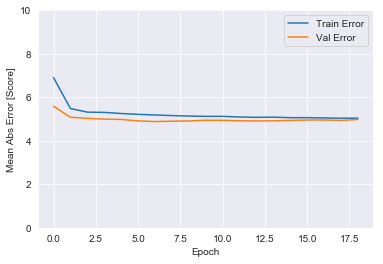

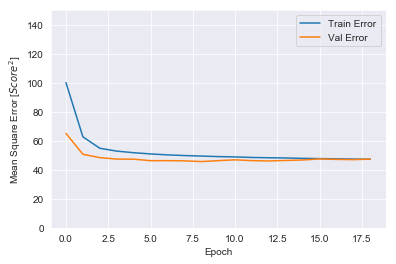

In [339]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


In [340]:
columns = WR_train.drop('Score', axis=1)
X_test = WRs[columns.columns]
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
WRs['DNN'] = new_predictions

In [341]:
X_train = WRtrain.drop('Score', axis=1).astype('float64')
y_train = WRtrain.Score
X_test = WRs[X_train.columns]
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
WRNe = neigh.predict(X_test)
WRs['NeProjections'] = WRNe

In [342]:
WRScores = pd.read_csv('Scores/WRScores.csv')
WR = pd.DataFrame({'Name': [], 'Score': []})
WR['Name'] = WRScores['Name']
WR['Score'] = WRScores['FantasyPointsDraftKings']
WR = WR.set_index('Name')
WRs = WRs.join(WR)
WRs = WRs.dropna()
WRs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5400.0,12.65,38.69,24.0,69.000000,410.700000,6.0,25.700000,12.100000,36.4,...,52.1,89.8,0.0,13.9,8.5,13.9,20.8,12.601176,7.54,11.00
Christian Kirk,4900.0,11.33,38.69,24.0,69.000000,410.700000,6.0,25.700000,12.100000,36.4,...,44.2,76.2,0.5,12.6,8.8,13.1,22.1,14.944562,7.54,2.80
JJ Nelson,3000.0,2.66,38.69,24.0,69.000000,410.700000,6.0,25.700000,12.100000,36.4,...,11.4,19.7,2.9,10.7,6.8,13.6,6.4,7.566011,5.68,-1.00
Trent Sherfield,3000.0,0.30,38.69,24.0,69.000000,410.700000,6.0,25.700000,12.100000,36.4,...,7.7,11.0,0.0,0.0,0.0,0.0,0.0,4.945345,5.68,0.00
Julio Jones,8300.0,23.61,41.03,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,...,54.9,79.9,0.2,20.6,13.8,20.9,40.7,21.962830,13.88,26.70
Calvin Ridley,5900.0,12.12,41.03,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,...,39.6,57.6,1.4,13.8,11.5,15.2,37.4,9.902246,13.76,7.00
Mohamed Sanu,5300.0,10.25,41.03,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,...,51.9,75.6,0.2,10.3,7.5,10.5,20.8,10.124613,13.48,9.70
Marvin Hall,3100.0,2.36,41.03,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,...,12.3,18.0,0.0,9.9,8.1,9.9,26.0,1.863270,8.16,2.20
Justin Hardy,3000.0,2.20,41.03,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,...,15.6,22.7,0.0,7.9,5.0,7.9,9.9,2.549135,3.34,1.70


In [343]:
y_test = WRs.Score
y_pred = WRs.DNN
mean_squared_error(y_test, y_pred)

62.45651679462009

In [344]:
y_test = WRs.Score
y_pred = WRs.NeProjections
mean_squared_error(y_test, y_pred)

56.133340363636364

In [345]:
TEtrain = TEtrain.dropna(axis=1).drop(['Unnamed: 0', 'SnapsPlayed'], axis=1)
TEtrain.head()

,Name,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Crockett Gillmore,4.750000,3.250000,70.825000,45.250000,0.5,9.700000,13.100000,0.0,0.0,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
1,Nick Boyle,1.500000,1.333333,45.833333,9.666667,0.0,3.583333,3.750000,0.0,0.0,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
2,Tyler Eifert,6.777778,4.444444,63.655556,51.111111,1.0,7.566667,10.511111,0.0,0.0,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
3,Tyler Kroft,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
4,Ryan Hewitt,0.666667,0.333333,27.777778,5.000000,0.0,4.111111,5.000000,0.0,0.0,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79


In [346]:
TEtrain = TEtrain.set_index('Name')

In [347]:
TE_train = TEtrain.drop('Home', axis=1)

train_dataset = TE_train.sample(frac=0.8,random_state=0)
test_dataset = TE_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TargetsGame,2190.0,3.416433,2.431630,0.000000,1.285714,2.833333,5.138393,13.500000
RecGame,2190.0,2.254451,1.692662,0.000000,0.857143,1.825758,3.500000,9.000000
RecPercentage,2190.0,53.723004,21.387650,0.000000,40.000000,57.702857,69.006818,100.000000
RecYardsGame,2190.0,25.103386,20.809608,-0.600000,8.093407,20.000000,38.057692,114.500000
RecTdGame,2190.0,0.202112,0.247367,0.000000,0.000000,0.142857,0.333333,3.000000
YardsTarget,2190.0,5.863342,3.073996,-0.600000,3.783929,5.889205,7.761154,27.000000
RecYardsRec,2190.0,8.054724,4.304829,-0.600000,5.000000,8.250000,10.840476,35.000000
RushesGame,2190.0,0.009763,0.050802,0.000000,0.000000,0.000000,0.000000,1.000000
RushYardsGame,2190.0,0.032816,0.262549,-0.800000,0.000000,0.000000,0.000000,5.500000
YardAttempt,2190.0,0.032816,0.262549,-0.800000,0.000000,0.000000,0.000000,5.500000


In [348]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 40)                2720      
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 41        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________



...................................

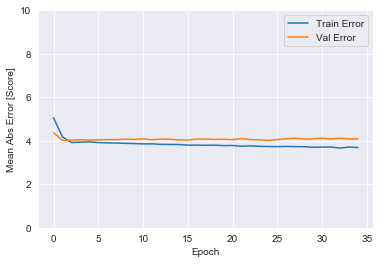

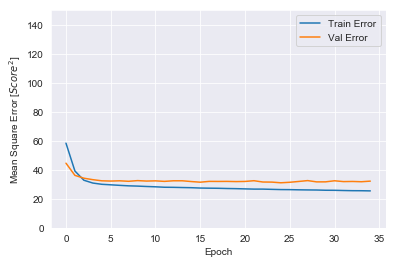

In [349]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [350]:
TE = pd.read_csv('Input/Aggregate/TEAggregate.csv')
TEavg = pd.DataFrame()
TEavg['Name'] = TE['Name']
TEavg['Rank'] = TE['Rank']
TEavg['Team'] = TE['Team']
TEavg['TargetsGame'] = TE['ReceivingTargets'] / TE['Played']
TEavg['RecGame'] = TE['Receptions'] / TE['Played']
TEavg['RecPercentage'] = TE['ReceptionPercentage']
TEavg['RecYardsGame'] = TE['ReceivingYards'] / TE['Played']
TEavg['RecTdGame'] = TE['ReceivingTouchdowns'] / TE['Played']
TEavg['YardsTarget'] = TE['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TE['ReceivingYardsPerReception']
TEavg['RushesGame'] = TE['RushingAttempts'] / TE['Played']
TEavg['RushYardsGame'] = TE['RushingYards'] / TE['Played']
TEavg['YardAttempt'] = TE['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TE['RushingTouchdowns']
TEavg['PointsGame'] = TE['FantasyPointsPerGameDraftKings']
TEavg = TEavg.set_index('Name')
TEavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Travis Kelce,1,KC,8.777778,5.666667,64.6,82.333333,0.666667,9.4,14.5,0.000,0.000,0,0,18.9
Zach Ertz,2,PHI,10.500000,7.625000,72.6,80.500000,0.375000,7.7,10.6,0.000,0.000,0,0,19.0
George Kittle,3,SF,6.777778,4.555556,67.2,76.888889,0.333333,11.3,16.9,0.000,0.000,0,0,15.1
Eric Ebron,4,IND,7.750000,4.500000,58.1,49.250000,0.875000,6.4,10.9,0.125,-0.125,-1,0,15.0
Jared Cook,5,OAK,6.250000,4.750000,76.0,61.750000,0.375000,9.9,13.0,0.000,0.000,0,0,13.9


In [351]:
TERZ = pd.read_csv('Input/RZ/TERZ.csv')
TERZavg = pd.DataFrame()
TERZavg['Name'] = TERZ['Name']
TERZavg['RZTargetsGame'] = TERZ['ReceivingTargets'] / TERZ['Played']
TERZavg['RZRecGame'] = TERZ['Receptions'] / TERZ['Played']
TERZavg['RZRecPercentage'] = TERZ['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZ['ReceivingYards'] / TERZ['Played']
TERZavg['RZRecTdGame'] = TERZ['ReceivingTouchdowns'] / TERZ['Played']
TERZavg['RZYardsTarget'] = TERZ['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZ['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZ['RushingAttempts'] / TERZ['Played']
TERZavg['RZRushYardsGame'] = TERZ['RushingYards'] / TERZ['Played']
TERZavg['RZYardAttempt'] = TERZ['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZ['RushingTouchdowns'] / TERZ['Played']
TERZavg['RZPointsGame'] = TERZ['FantasyPointsPerGameDraftKings']
TERZ = TERZavg.set_index('Name')
TERZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Eric Ebron,1.875000,0.875000,46.7,9.250000,0.750000,4.9,10.6,0.125,-0.125,-1,0.0,6.3
Travis Kelce,1.555556,0.888889,57.1,8.666667,0.555556,5.6,9.8,0.000,0.000,0,0.0,5.1
Trey Burton,1.000000,0.875000,87.5,5.000000,0.500000,5.0,5.7,0.125,0.250,2,0.0,4.4
OJ Howard,0.875000,0.625000,71.4,6.250000,0.500000,7.1,10.0,0.000,0.000,0,0.0,4.2
Zach Ertz,1.750000,0.875000,50.0,6.250000,0.375000,3.6,7.1,0.000,0.000,0,0.0,3.8


In [353]:
TEsnaps = pd.read_csv('Input/Snaps/TESnaps.csv')
TEsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Jordan Franks,CIN,TE,1,1,1.0,1.5,0.0,100.0,100.0,100.0,4.2,420.0
1,2,Erik Swoope,IND,TE,5,55,11.0,11.2,0.0,14.5,12.7,14.5,33.3,60.5
2,3,Eric Ebron,IND,TE,9,360,40.0,56.0,0.6,18.1,11.4,18.6,148.4,41.2
3,4,Seth DeValve,CLE,TE,7,39,5.6,7.8,0.0,10.3,7.7,10.3,14.4,36.9
4,5,Mo Alie-Cox,IND,TE,5,105,21.0,29.3,0.0,9.5,5.7,9.5,29.2,27.8


In [354]:
TEsnaps = TEsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
TEsnaps = TEsnaps.set_index('Name')

In [355]:
TEDef = pd.DataFrame()
TEDef['Team'] = Defense['Team']
TEDef['DPointsAllowed'] = Defense['DraftKingsTightEndFantasyPointsAllowedAverage']
TEDef = TEDef.set_index('Team')
TEDef.head()

,DPointsAllowed
Team,
JAX,10.29
BAL,12.59
DAL,10.91
SEA,7.70
TEN,7.48


In [356]:
TESalaries = pd.read_csv('Input/Salaries/TESalaries.csv').dropna()
TESalaries = TESalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
TESalaries = TESalaries.set_index('Opponent')
TESalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
ARI,Travis Kelce,KC,7000.0,17.74
DAL,Zach Ertz,PHI,6300.0,14.85
NYG,George Kittle,SF,5900.0,13.14
PIT,Greg Olsen,CAR,5100.0,11.85
TEN,Rob Gronkowski,NE,5600.0,11.48


In [357]:
TESalaries = TESalaries.join(TEDef).join(QBDefense)
TESalaries = TESalaries.set_index('Team').join(Vegas).join(WROffense)
TESalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Ricky Seals-Jones,3000.0,7.38,15.21,24.0,69.0,410.7,6.0,25.7,12.1,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,Jermaine Gresham,2600.0,3.13,15.21,24.0,69.0,410.7,6.0,25.7,12.1,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,John Phillips,2500.0,0.11,15.21,24.0,69.0,410.7,6.0,25.7,12.1,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ATL,Austin Hooper,3800.0,9.31,14.40,26.3,72.3,419.7,5.8,24.4,13.3,...,51.3,3.220902,69.0,39.983607,71.1,318.980328,8.0,11.2,2.332377,111
ATL,Eric Saubert,2500.0,0.98,14.40,26.3,72.3,419.7,5.8,24.4,13.3,...,51.3,3.220902,69.0,39.983607,71.1,318.980328,8.0,11.2,2.332377,111


In [358]:
TESalaries = TESalaries.set_index('Name')
TESalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,3000.0,7.38,15.21,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Jermaine Gresham,2600.0,3.13,15.21,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
John Phillips,2500.0,0.11,15.21,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Austin Hooper,3800.0,9.31,14.40,26.3,72.3,419.7,5.8,24.4,13.3,36.8,...,51.3,3.220902,69.0,39.983607,71.1,318.980328,8.0,11.2,2.332377,111
Eric Saubert,2500.0,0.98,14.40,26.3,72.3,419.7,5.8,24.4,13.3,36.8,...,51.3,3.220902,69.0,39.983607,71.1,318.980328,8.0,11.2,2.332377,111


In [359]:
TEs = TESalaries.join(TEavg).join(TERZ).join(TEsnaps).dropna()
TEs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,3000.0,7.38,15.21,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,0.0,0.0,0.0,41.1,70.9,0.0,13.0,6.5,13.0,15.3
Jermaine Gresham,2600.0,3.13,15.21,24.0,69.0,410.7,6.0,25.7,12.1,36.4,...,0.0,0.0,0.4,29.6,48.8,0.0,3.4,2.9,3.4,5.7
Austin Hooper,3800.0,9.31,14.40,26.3,72.3,419.7,5.8,24.4,13.3,36.8,...,0.0,0.0,2.6,56.3,82.0,0.0,10.8,9.1,10.8,21.3
Eric Saubert,2500.0,0.98,14.40,26.3,72.3,419.7,5.8,24.4,13.3,36.8,...,0.0,0.0,0.0,7.8,11.3,0.0,8.6,4.3,8.6,9.0
Logan Paulsen,2500.0,0.45,14.40,26.3,72.3,419.7,5.8,24.4,13.3,36.8,...,0.0,0.0,1.1,26.4,38.5,0.0,2.1,2.1,2.1,6.8


In [360]:
columns = TE_train.drop('Score', axis=1)
X_test = TEs[columns.columns]
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
TEs['DNN'] = new_predictions

In [361]:
X_train = TEtrain.drop('Score', axis=1).astype('float64')
y_train = TEtrain.Score
X_test = TEs[X_train.columns]
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
TENe = neigh.predict(X_test)
TEs['NeProjections'] = TENe

In [362]:
TEScores = pd.read_csv('Scores/TEScores.csv')
TE = pd.DataFrame({'Name': [], 'Score': []})
TE['Name'] = TEScores['Name']
TE['Score'] = TEScores['FantasyPointsDraftKings']
TE = TE.set_index('Name')
TEs = TEs.join(TE)
TEs = TEs.dropna()
TEs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,3000.0,7.38,15.21,24.0,69.000000,410.700000,6.0,25.700000,12.100000,36.4,...,41.1,70.9,0.0,13.0,6.5,13.0,15.3,8.891842,3.18,10.1
Jermaine Gresham,2600.0,3.13,15.21,24.0,69.000000,410.700000,6.0,25.700000,12.100000,36.4,...,29.6,48.8,0.0,3.4,2.9,3.4,5.7,3.835276,4.96,0.0
Austin Hooper,3800.0,9.31,14.40,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,...,56.3,82.0,0.0,10.8,9.1,10.8,21.3,10.502250,9.46,21.6
Eric Saubert,2500.0,0.98,14.40,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,...,7.8,11.3,0.0,8.6,4.3,8.6,9.0,2.333060,1.20,2.7
Logan Paulsen,2500.0,0.45,14.40,26.3,72.300000,419.700000,5.8,24.400000,13.300000,36.8,...,26.4,38.5,0.0,2.1,2.1,2.1,6.8,-1.842150,2.92,3.3
Jason Croom,2500.0,4.23,8.19,25.4,66.900000,361.600000,5.4,19.800000,14.400000,33.3,...,22.8,34.4,0.0,9.2,5.7,9.2,16.3,4.551681,4.68,6.0
Logan Thomas,2600.0,3.95,8.19,25.4,66.900000,361.600000,5.4,19.800000,14.400000,33.3,...,23.0,34.3,0.0,7.1,6.5,7.6,10.2,4.128798,4.04,1.7
Greg Olsen,5100.0,11.85,17.29,23.2,64.493780,335.789474,5.2,21.312919,12.321531,36.9,...,50.3,69.1,0.0,9.9,7.3,9.9,21.8,5.854366,8.90,8.0
Ian Thomas,2500.0,0.93,17.29,23.2,64.493780,335.789474,5.2,21.312919,12.321531,36.9,...,24.7,38.6,0.0,7.7,5.0,7.7,8.9,1.774734,2.78,0.0


In [363]:
y_test = TEs.Score
y_pred = TEs.DNN
mean_squared_error(y_test, y_pred)

23.94333168090517

In [364]:
y_test = TEs.Score
y_pred = TEs.NeProjections
mean_squared_error(y_test, y_pred)

33.500273684210526